## Importing Libraries

In [12]:
import numpy as np #Arrays and algebra 
import pandas as pd # Data Analysis + Manipulation tool
from sklearn import datasets, metrics, cluster # Library for machine Learning
import matplotlib.pyplot as plt #Graph plotting library
%matplotlib inline


## Read Iris Data 

In [13]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns= iris.feature_names)

## Print all 150 rows of the dataframe

In [35]:
data.head(150) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Summary of the Data Frame

In [15]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Print description of all statictics:

In [16]:
data.describe(include='all') 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Plotting Data to a Graph.

#### Sepal length 

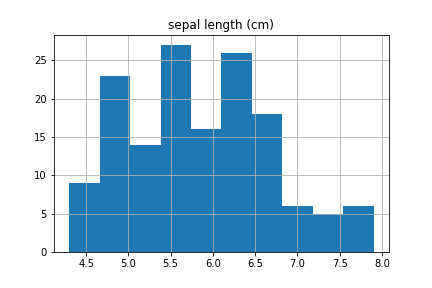

<Figure size 432x288 with 0 Axes>

In [17]:
data.hist(column='sepal length (cm)')
plt.show()



#### Sepal Width 

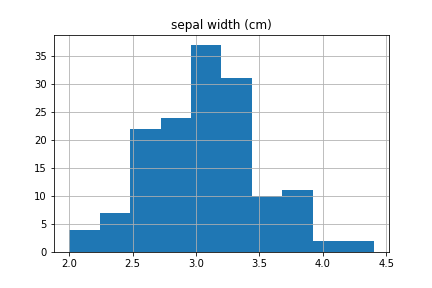

<Figure size 432x288 with 0 Axes>

In [37]:
data.hist(column='sepal width (cm)')
plt.show()

#### Petal length 

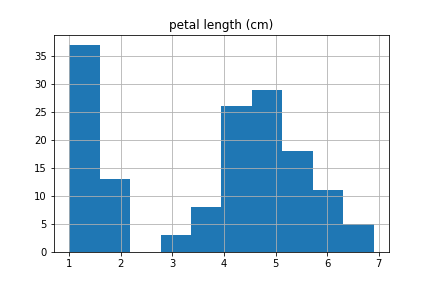

<Figure size 432x288 with 0 Axes>

In [19]:
data.hist(column='petal length (cm)')
plt.show()

#### Petal width 

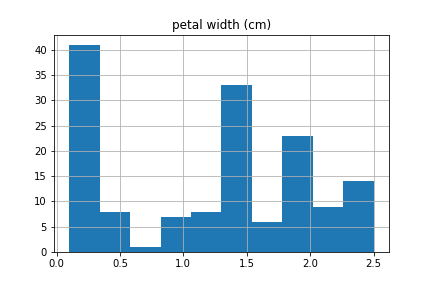

<Figure size 432x288 with 0 Axes>

In [20]:
data.hist(column='petal width (cm)')
plt.show()

## Finding K

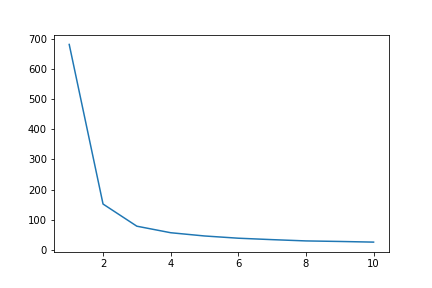

<Figure size 432x288 with 0 Axes>

In [21]:
Centroid_list = []
No_of_clusters = range(1,11)

for i in No_of_clusters :
    kmeans = cluster.KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data.values)
    Centroid_list.append(kmeans.inertia_)
    
plt.plot(No_of_clusters,Centroid_list)
plt.show()

The graph shown above is what is known as the elbow method and is a popular method in finding what K is (how many clusters there are).

We can see above that the elbow is at 3 therefore there should be 3 clusters; K=3.

## Amend K

In [22]:
kmeans = cluster.KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
centroid = kmeans.fit_predict(data.values)

#### Centroid Values

In [23]:
print(centroid)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Plotting Clusters

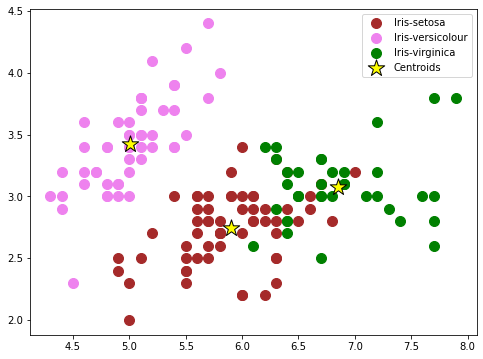

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(data.values[centroid == 0, 0], data.values[centroid == 0, 1],s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(data.values[centroid == 1, 0], data.values[centroid == 1, 1],s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(data.values[centroid == 2, 0], data.values[centroid == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, marker = "*",c = 'yellow', edgecolor = "black", label = 'Centroids')

plt.legend()

Clusters are displayed in the graph in brown, pink and green, with yellow stars representing the centroids. 